In [9]:
from tqdm.auto import tqdm
import numpy as np
import pickle
import lzma
import sys
import os


import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

plt.rc("text", usetex=False)
plt.rc("font", family="serif")

os.chdir("../")
import cpt_optimisation

In [2]:
num_agents = 1225

# Distribution of final agent wealths for each regime

In [10]:
final_w_agent = {0:[], 1:[], 2:[]}
for seed in os.listdir("DATA/nodebt/"):
    for f in tqdm(os.listdir(f"DATA/nodebt/{seed}")):
        data = pickle.load(lzma.open(f"DATA/nodebt/{seed}/{f}"))["W"]
        prop_richer = np.sum(data[-1]>data[0]) / num_agents
        if prop_richer == 0:
            pred = 0
        elif prop_richer < 1:
            pred = 1
        else:
            pred = 2
        final_w_agent[pred].append(data[-1,:])

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

In [11]:
# with open("notebooks/final_agent_w_data.pickle", "wb") as f:
#     pickle.dump(final_w_agent, f)

In [15]:
# with open("notebooks/final_agent_w_data.pickle", "rb") as f:
#     final_w_agent = pickle.load(f)

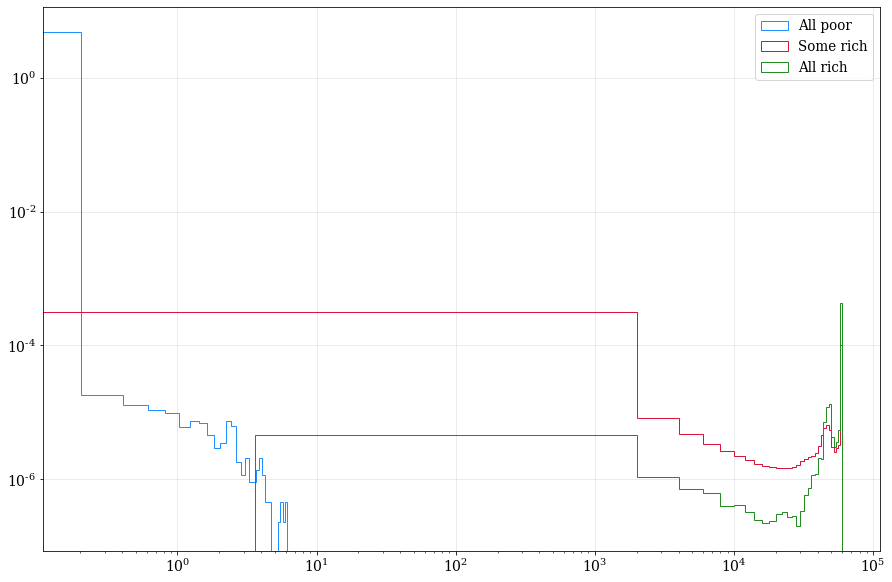

In [24]:
fig, axs = plt.subplots(1, figsize=(15,10))

plt.hist(np.concatenate(final_w_agent[0]), histtype="step", 
         bins=30, color="dodgerblue", density=True, label="All poor")
plt.hist(np.concatenate(final_w_agent[1]), histtype="step", 
         bins=30, color="crimson", density=True, label="Some rich")
plt.hist(np.concatenate(final_w_agent[2]), histtype="step", 
         bins=30, color="forestgreen", density=True, label="All rich")

plt.xscale("log")
plt.yscale("log")
fig.patch.set_facecolor('xkcd:white')
plt.legend()
plt.show()

In [25]:
del final_w_agent

# Distribution of final community wealths for each regime

In [3]:
final_w_comm = {0:[], 1:[], 2:[]}
for seed in os.listdir("DATA/nodebt/"):
    s = int(seed.split("_")[-1])
    for f in tqdm(os.listdir(f"DATA/nodebt/{seed}")):
        data = pickle.load(lzma.open(f"DATA/nodebt/{seed}/{f}"))

        # retrieve communities from graph
        alpha = data["params"][4]
        with open(f"sda_graphs/{s}_{alpha}.pickle", "rb") as f:
            communities, _, _, _ = pickle.load(f)
        NC = len(communities) 
        
        # track initial and final average community wealths
        data_W = data["W"]
        init_w = []
        final_w = []
        for i,c in enumerate(communities):
            idx = np.array(list(c))
            init_w.append(np.mean(data_W[0, idx]))
            final_w.append(np.mean(data_W[-1, idx]))
            
            # community is richer on average at end of simulation than start
            if final_w[-1] > init_w[-1]:
                # check whether some agents in the community are poorer than start
                if np.sum(data_W[0,idx] > data_W[-1,idx]) > 0:
                    import IPython; IPython.embed()
                    
                
        
        prop_richer = np.sum(np.array(final_w) > np.array(init_w)) / NC
        if prop_richer == 0:
            pred = 0
        elif prop_richer < 1:
            pred = 1
        else:
            pred = 2            

        final_w_comm[pred].append(final_w)

  0%|          | 0/7168 [00:00<?, ?it/s]

Python 3.10.4 (v3.10.4:9d38120e33, Mar 23 2022, 17:29:05) [Clang 13.0.0 (clang-1300.0.29.30)]
Type 'copyright', 'credits' or 'license' for more information
IPython 8.4.0 -- An enhanced Interactive Python. Type '?' for help.

In [1]: c
Out[1]: 
{1,
 62,
 75,
 82,
 110,
 125,
 189,
 213,
 218,
 247,
 261,
 322,
 324,
 344,
 356,
 368,
 378,
 392,
 395,
 398,
 411,
 436,
 447,
 490,
 500,
 549,
 580,
 608,
 658,
 676,
 696,
 729,
 734,
 784,
 842,
 853,
 859,
 879,
 915,
 957,
 963,
 1015,
 1017,
 1020,
 1028,
 1029,
 1042,
 1060,
 1100,
 1139,
 1149,
 1181,
 1197,
 1211,
 1212}

In [2]: len(c)
Out[2]: 55

In [3]: communities[-1]
Out[3]: {655, 806, 895, 1013}

In [4]: data_W.shape
Out[4]: (101, 1225)

In [5]: data_W[-1,list(c)]
Out[5]: 
array([6.000e+04, 4.516e+03, 1.536e+02, 6.000e+04, 3.350e+03, 6.000e+04,
       4.749e+04, 6.000e+04, 6.000e+04, 4.280e+02, 6.000e+04, 6.000e+04,
       6.000e+04, 8.418e-01, 1.198e+04, 6.000e+04, 6.000e+04, 6.000e+04,
       8.156e+01, 1.226e+03, 6.000e+0

Exception ignored in: <function tqdm.__del__ at 0x1109a3370>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/std.py", line 1161, in __del__
    def __del__(self):
KeyboardInterrupt: 


KeyboardInterrupt: Interrupted by user

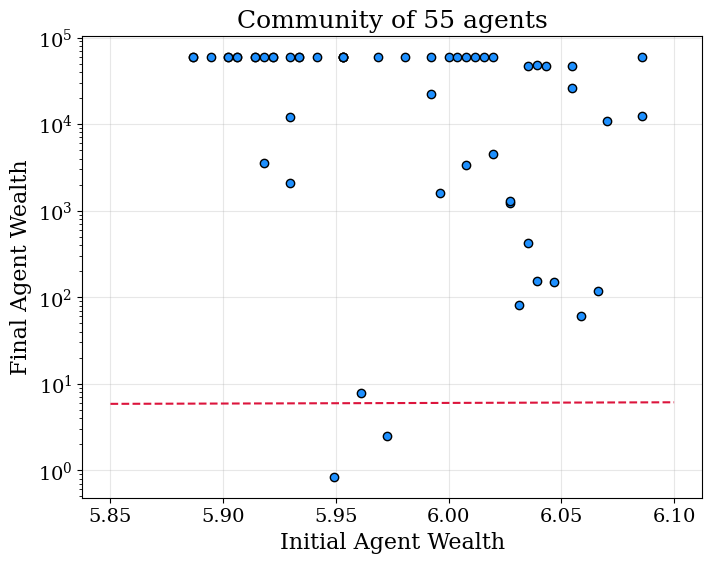

In [35]:
# plt.scatter(data["W"][0,list(communities[1])], data["W"][-1,list(communities[1])], 
#             color="dodgerblue", edgecolor="k")

# x = np.linspace(5.85, 6.1, 1000)
# plt.plot(x, x, linestyle="dashed", color="crimson")
# plt.yscale("log")
# plt.xlabel("Initial Agent Wealth")
# plt.ylabel("Final Agent Wealth")
# plt.title("Community of 55 agents")
# plt.show()

In [4]:
# with open("notebooks/final_comm_w_data.pickle", "wb") as f:
#     pickle.dump(final_w_comm, f)

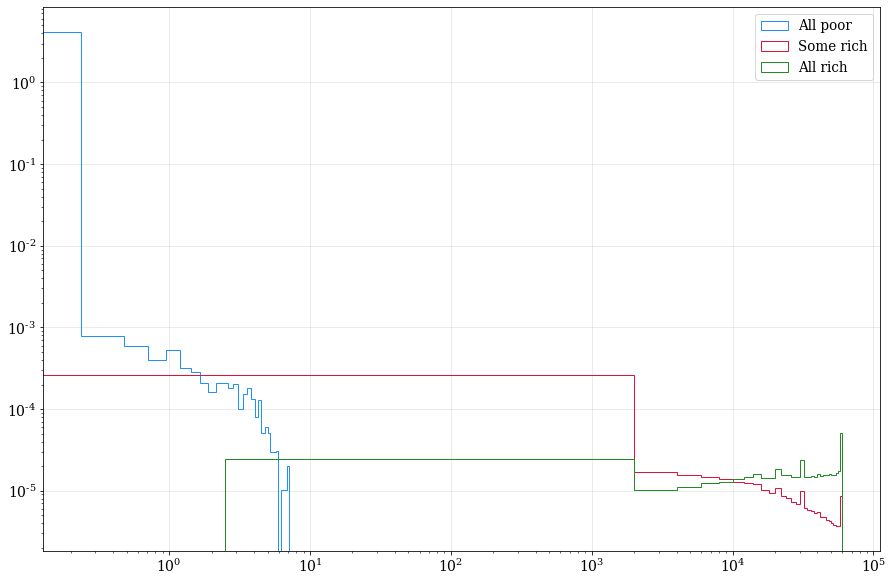

In [5]:
fig, axs = plt.subplots(1, figsize=(15,10))

plt.hist(np.concatenate(final_w_comm[0]), histtype="step", 
         bins=30, color="dodgerblue", density=True, label="All poor")
plt.hist(np.concatenate(final_w_comm[1]), histtype="step", 
         bins=30, color="crimson", density=True, label="Some rich")
plt.hist(np.concatenate(final_w_comm[2]), histtype="step", 
         bins=30, color="forestgreen", density=True, label="All rich")

plt.xscale("log")
plt.yscale("log")
fig.patch.set_facecolor('xkcd:white')
plt.legend()
plt.show()

In [6]:
del final_w_comm

# Distribution of final gini coefficients for each regime

In [2]:
def gini(x):
    mad = np.abs(np.subtract.outer(x, x)).mean()
    mean = np.mean(x) or 1
    rmad = mad/mean
    g = 0.5 * rmad
    return g

In [5]:
ginis = {0:[], 1:[], 2:[]}
for seed in os.listdir("DATA/nodebt/"):
    for f in tqdm(os.listdir(f"DATA/nodebt/{seed}")):
        data = pickle.load(lzma.open(f"DATA/nodebt/{seed}/{f}"))["W"]
        
        # retrieve communities from graph
        alpha = data["params"][4]
        with open(f"sda_graphs/{s}_{alpha}.pickle", "rb") as f:
            communities, _, _, _ = pickle.load(f)
        NC = len(communities) 
        
        # track initial and final average community wealths
        data_W = data["W"]
        init_w = []
        final_w = []
        for i,c in enumerate(communities):
            idx = np.array(list(c))
            init_w.append(np.mean(data_W[0, idx]))
            final_w.append(np.mean(data_W[-1, idx]))
        
        prop_richer = np.sum(np.array(final_w) > np.array(init_w)) / NC
        if prop_richer == 0:
            pred = 0
        elif prop_richer < 1:
            pred = 1
        else:
            pred = 2

        ginis[pred].append(gini(final_w))

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

In [25]:
with open("notebooks/final_ginis_data.pickle", "wb") as f:
    pickle.dump(ginis, f)

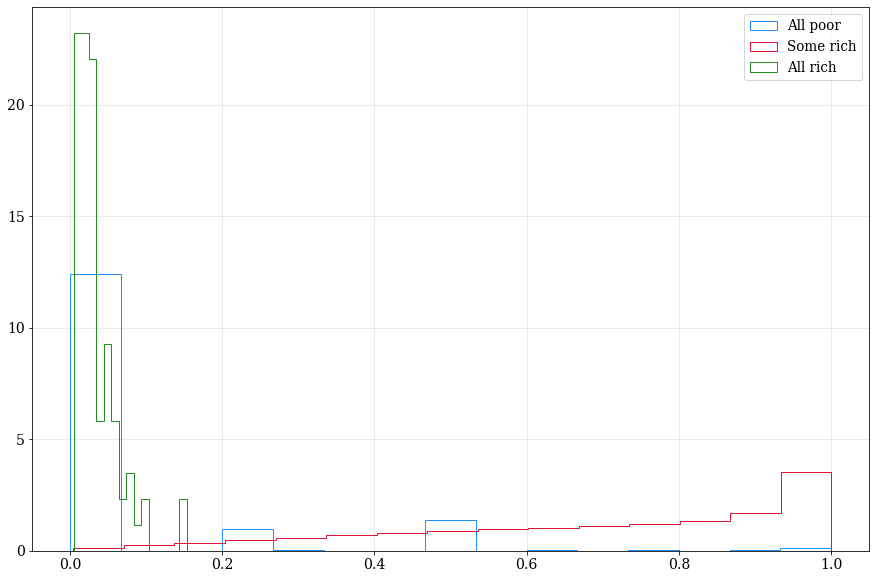

In [29]:
fig, axs = plt.subplots(1, figsize=(15,10))

plt.hist(ginis[0], histtype="step", 
         bins=15, color="dodgerblue", density=True, label="All poor")
plt.hist(ginis[1], histtype="step",
         bins=15, color="crimson", density=True, label="Some rich")
plt.hist(ginis[2], histtype="step", 
         bins=15, color="forestgreen", density=True, label="All rich")

# plt.xscale("log")
# plt.yscale("log")
fig.patch.set_facecolor('xkcd:white')
plt.legend()
plt.show()